*   Find the 10-day 95% VaR of a portfolio worth 100m today, invested in 3 stocks with weights
*    30%, 30% and 40%.  The annual returns are 10%, 12%, and 15%, respectively, 
*       with covariance matrix V0


In [1]:
import numpy as np
import scipy.linalg as la      # we need the package to compute the Cholesky decomposition
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)         # so that the random numbers will be the same each time running the program

N = 3
V0 = np.array([[1, 0.1, 0.3], 
               [0.1, 2, 0.5], 
               [0.3, 0.5, 3]])
V1 = V0 / 252      #  daily variance, convention to use 252 trading days 
                   # if vol, we should divide by /sqrt(252)
V10 = 10*V1        # 10-day variance
w = np.array([[0.3, 0.3, 0.4]])           # portfolio weight, 1 by 3
mu = np.array([[0.3, 0.3, 0.4]])          # expected return
mu = mu.T                                 # make it 3 by 1
mu10 = 10*mu/365                           # 10-day return

L1 = la.cholesky(V10)             # Cholesky decomposition:  V10 = L1'*L1

L = L1.T                           # V10 = L*L',  L=L1'
e = np.random.randn(3,1)   

Y = mu10 + np.matmul(L,e)              # a random draw/realization of the returns
ValueC = 100*(1 + np.dot(w,Y)) - 100     # change of value 
  
print(' a random draw/realization of the returns  \n')
print(Y)

 a random draw/realization of the returns  

[[ 0.21863182]
 [-0.72059803]
 [ 0.9667945 ]]


In [2]:
##  Now we darw 10,000 of the returns and find the 95% worst percentile break point
        
Z = np.ones((10000,1))    # define Z to store the draws   

for i in range (10000):
    e = np.random.randn(3,1)    
    Y = mu10 + np.matmul(L,e)
    ValueC = 100*(1 + np.dot(w,Y)) - 100
    Z[i] = ValueC

ZZ = np.sort(Z.T)                 # sort in increasing order, input:  row vector

T = 10000
p5 = (5/100)*T
p5 = round(p5)                  # round it to an integer if not one already

print('  The Value at risk, VaR, at the 95% confidence  \n')
print(ZZ[0,p5])

  The Value at risk, VaR, at the 95% confidence  

-70.56674663974864


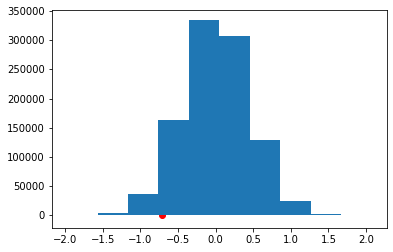

In [85]:
# plot the histogram of returns and the VaR 

x = ZZ[0,p5] / 100
y = 0

Re = ZZ.T / 100
p = plt.hist(Re)
p1 = plt.scatter([x], [y],color='red')
plt.show()